In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the processed data
TRAIN_XX = np.load('output/TRAIN_XX_11var.npy')
TRAIN_YY = np.load('output/TRAIN_YY_11var.npy')

In [3]:
#reorder the axis for test_train_split
X = np.moveaxis(TRAIN_XX, 0, 2)
print(X.shape)
y = np.moveaxis(TRAIN_YY, 0, 2)
print(y.shape)

(128, 128, 3799, 11)
(128, 128, 3799, 1)


In [4]:
#Check the frequency of each class and the proportion of class 1
unique, counts = np.unique(y, return_counts=True)
print(unique[0], " :", counts[0])
print(unique[1], " :", counts[1])
toti = counts[0] + counts[1]
class1_prop = counts[1] / toti
print("tot  :", toti)
print("class 1 proportion: {:.2f} %".format(class1_prop * 100))

0.0  : 60800026
1.0  : 1442790
tot  : 62242816
class 1 proportion: 2.32 %


In [5]:
#Create an array which holds each image index which have landslide presence
result = np.where(y == 1)[2]
result_sort = np.sort(result)
result_sort = np.unique(result_sort)
print(result_sort[:10])

#Create an array "y_strat" which will hold the length of 3799 and a 0 indexed for each image without landslide and a 1 for each with landslide 
# (To enable stratify in test_train_split).
y_strat = np.zeros(3799)
for i, v in enumerate(result_sort):
    y_strat[v] = 1
print(y_strat[:10])

[ 0  2  3  4  5  6  7  8  9 10]
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
#Split the data into test, train while preserving the image shapes
from sklearn.model_selection import train_test_split
all_indices = list(range(3799))
train_ind, test_ind = train_test_split(all_indices,  random_state=0, shuffle=True, stratify=y_strat)

X_train_dummy = X[:,:,train_ind,:]
X_test_dummy = X[:,:,test_ind, :]

y_train_dummy = y[:,:,train_ind,:]
y_test_dummy = y[:,:,test_ind, :]

print(X_train_dummy.shape, X_test_dummy.shape)
print(y_train_dummy.shape, y_test_dummy.shape)

(128, 128, 2849, 11) (128, 128, 950, 11)
(128, 128, 2849, 1) (128, 128, 950, 1)


In [224]:
#Stack the X datasets into 2d arrays to fit the model
X_train = np.vstack((X_train_dummy[0]))
for i in X_train_dummy[1:]:
    X_train = np.concatenate((X_train,np.vstack((i))),axis=0)
print("new X_train shape: {}".format(X_train.shape))

X_test = np.vstack((X_test_dummy[0]))
for i in X_test_dummy[1:]:
    X_test = np.concatenate((X_test,np.vstack((i))),axis=0)
print("new X_test shape: {}".format(X_test.shape))

new X_train shape: (46678016, 11)
new X_test shape: (15564800, 11)


In [8]:
#Stack the y datasets into 1d arrays to fit the model
y_train = np.vstack((y_train_dummy[0]))
for i in y_train_dummy[1:]:
    y_train = np.concatenate((y_train,np.vstack((i))),axis=0)
y_train = y_train.reshape(-1)
print("new y_train shape: {}".format(y_train.shape))

y_test = np.vstack((y_test_dummy[0]))
for i in y_test_dummy [1:]:
    y_test = np.concatenate((y_test,np.vstack((i))),axis=0)
y_test = y_test.reshape(-1)
print("new y_test shape: {}".format(y_test.shape))

new y_train shape: (46678016,)
new y_test shape: (15564800,)


In [9]:
#Due to the imbalanced distribution between 0's and 1's a RandomUnderSampler is performed.
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Randomly under sample the majority class (0's)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

In [225]:
#Verify the resampled distribution between the two classes
unique, counts = np.unique(y_train_rus, return_counts=True)
print(unique[0], " :", counts[0])
print(unique[1], " :", counts[1])
toti = counts[0] + counts[1]
class1_prop = counts[1] / toti
print("tot  :", toti)
print("class 1 proportion: {:.2f} %".format(class1_prop * 100))

0.0  : 1067017
1.0  : 1067017
tot  : 2134034
class 1 proportion: 50.00 %


In [11]:
#Check the shape of the stacked train/test datasets
print("X_train_rus shape:", X_train_rus.shape)
print("y_train_rus shape:", y_train_rus.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train_rus shape: (2134034, 11)
y_train_rus shape: (2134034,)
X_test shape: (15564800, 11)
y_test shape: (15564800,)


In [12]:
#Instantiate Random Forest Classifier with 100 trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0, verbose=3,n_jobs=-1)

In [13]:
#Fit the model
rfc.fit(X_train_rus, y_train_rus)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   52.8s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.2min finished


RandomForestClassifier(n_jobs=-1, random_state=0, verbose=3)

In [14]:
#Predict
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   15.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  1.5min finished


In [15]:
#Evaluate the prediction of the test dataset, first
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n")
print("True Positive: ", confusion_matrix(y_test,y_pred)[0][0])
print("False Negative: ", confusion_matrix(y_test,y_pred)[0][1])
print("False Positive: ", confusion_matrix(y_test,y_pred)[1][0])
print("True Negative: ", confusion_matrix(y_test,y_pred)[1][1])
print("\nClassification Report: \n")
print(classification_report(y_test,y_pred))

Confusion Matrix:

True Positive:  14361485
False Negative:  827542
False Positive:  23066
True Negative:  352707

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97  15189027
         1.0       0.30      0.94      0.45    375773

    accuracy                           0.95  15564800
   macro avg       0.65      0.94      0.71  15564800
weighted avg       0.98      0.95      0.96  15564800



In [16]:
#Due to the skewness between precision and recall the threshold is set to 0.95, it worsens precision but improves recall
threshold = 0.95
predicted_proba = rfc.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   16.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  1.5min finished


In [17]:
#Evaluate the prediction of the test dataset, second
#With a changed threshold we receive a better f1-score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n")
print("True Positive: ", confusion_matrix(y_test,y_pred)[0][0])
print("False Negative: ", confusion_matrix(y_test,y_pred)[0][1])
print("False Positive: ", confusion_matrix(y_test,y_pred)[1][0])
print("True Negative: ", confusion_matrix(y_test,y_pred)[1][1])
print("\nClassification Report: \n")
print(classification_report(y_test,y_pred))

Confusion Matrix:

True Positive:  15067916
False Negative:  121111
False Positive:  125006
True Negative:  250767

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99  15189027
         1.0       0.67      0.67      0.67    375773

    accuracy                           0.98  15564800
   macro avg       0.83      0.83      0.83  15564800
weighted avg       0.98      0.98      0.98  15564800



11


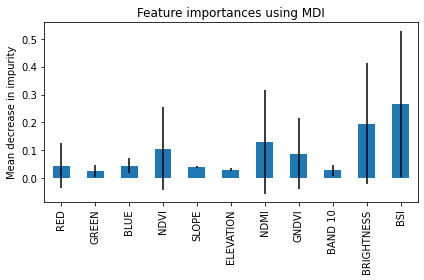

In [217]:
#Create a list containing each feature name
feature_names = ['RED', 'GREEN', 'BLUE', 'NDVI', 'SLOPE', 'ELEVATION', 'NDMI', 'GNDVI', 'BAND 10', 'BRIGHTNESS', 'BSI']
print(len(feature_names))

#Extract feature importance and std
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

#Plot the feature importance
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
#Restore the predicted data into images of size 128x128
y_pred_reshaped = y_pred.reshape(128, 128, 950, 1)
print(y_pred_reshaped.shape)

(128, 128, 950, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


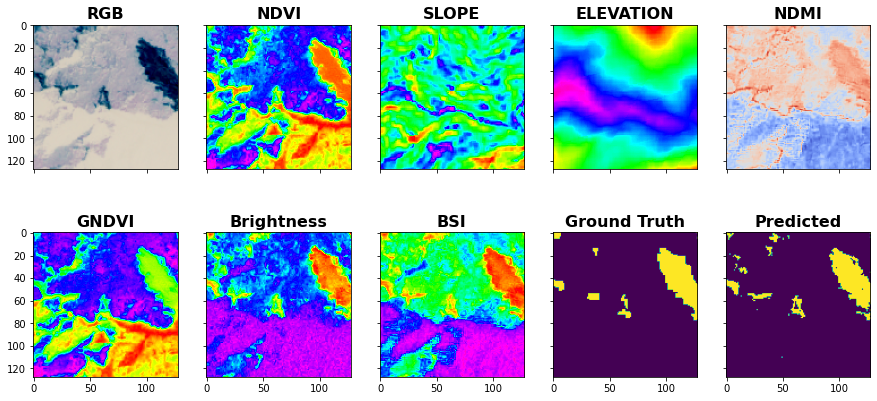

In [227]:
#Plot the most important features, the ground truth and the predicted output of an example image
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(15,7))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10 = axes.flatten()

ax1.set_title("RGB", fontweight='bold', fontsize='16')
ax1.imshow(X_test_dummy[:,:,40,0:3])

ax2.set_title("NDVI", fontweight='bold', fontsize='16')
ax2.imshow(X_test_dummy[:,:,40,3], cmap='gist_rainbow')

ax3.set_title("SLOPE", fontweight='bold', fontsize='16')
ax3.imshow(X_test_dummy[:,:,40,4], cmap='gist_rainbow')

ax4.set_title("ELEVATION", fontweight='bold', fontsize='16')
ax4.imshow(X_test_dummy[:,:,40,5], cmap='gist_rainbow')

ax5.set_title("NDMI", fontweight='bold', fontsize='16')
ax5.imshow(X_test_dummy[:,:,40,6], cmap='coolwarm_r')

ax6.set_title("GNDVI", fontweight='bold', fontsize='16')
ax6.imshow(X_test_dummy[:,:,40,7], cmap='gist_rainbow')

ax7.set_title("Brightness", fontweight='bold', fontsize='16')
ax7.imshow(X_test_dummy[:,:,40,9], cmap='gist_rainbow')

ax8.set_title("BSI", fontweight='bold', fontsize='16')
ax8.imshow(X_test_dummy[:,:,40,10], cmap='gist_rainbow')

ax9.set_title("Ground Truth", fontweight='bold', fontsize='16')
ax9.imshow(y_test_dummy[:,:,40,:])

ax10.set_title("Predicted", fontweight='bold', fontsize='16')
ax10.imshow(y_pred_reshaped[:,:,40,:])
plt.show()